todo:

- correlations
- Cross validations 
- Redandency

## Data Understanding

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


In [6]:
set1_df = pd.read_csv(r'../data/set9_it1.csv')
set2_df = pd.read_csv(r'../data/set9_it2.csv')
set3_df = pd.read_csv(r'../data/set9_it3.csv')

In [7]:
print(set1_df.isna().sum())
print(set2_df.isna().sum())
print(set3_df.isna().sum())


DI                  0
TradeValue          0
RealmType           0
Enclave             0
LivingQuarters    117
ParcelSize          0
ParcelSizeUnit      0
dtype: int64
DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64
DI                0
Craftsmanship     0
EraConstructed    0
dtype: int64


### Checking new data before cleaning

In [8]:
## if anyone has any idea what to check do it here 

## Data Preperation

In [9]:
# deleteing the rows with missing values 
set1_df.dropna(inplace=True)
# removes the duplicate rows in place
set1_df.drop_duplicates(inplace=True)
set2_df.drop_duplicates(inplace=True)
set3_df.drop_duplicates(inplace=True)

# Removing parcelSize below one
set1_df.drop(set1_df[set1_df['ParcelSize'] < 1].index, inplace=True)

# Cleaning capitalisation 
set1_df['Enclave'] = set1_df['Enclave'].str.capitalize()

# Replacing typos after manual inspection
set1_df['Enclave'] = set1_df['Enclave'].replace('Sunspires', 'Sunspire')
set1_df['Enclave'] = set1_df['Enclave'].replace('Dragonspires', 'dragonspire')

# Converting incosintent metrics
SQFT_TO_SQM = 0.092903

set1_df.loc[set1_df["ParcelSizeUnit"] == "sqft", "ParcelSize"] *= SQFT_TO_SQM
set1_df.loc[set1_df["ParcelSizeUnit"] == "sqft", "ParcelSizeUnit"] = "sqm"


In [10]:
df = set1_df.merge(set2_df, left_on='DI', right_on='DI')
df = df.merge(set3_df, left_on='DI', right_on='DI')

In [11]:

# Transforming ExteriorCharm to a Ordinal level of messeruments 
sortedCharms = list(df.groupby('ExteriorCharm')['TradeValue'].mean().sort_values().index)

df['ExteriorCharm'] = df['ExteriorCharm'].map(lambda x: sortedCharms.index(x))
df['RealmType'].unique()

array(['Meadowlands', 'GnomeBurough', 'ArcaneMarket', 'AetherIsles',
       'CitadelQuarter'], dtype=object)

I would love to translate this into some kind of coefficent

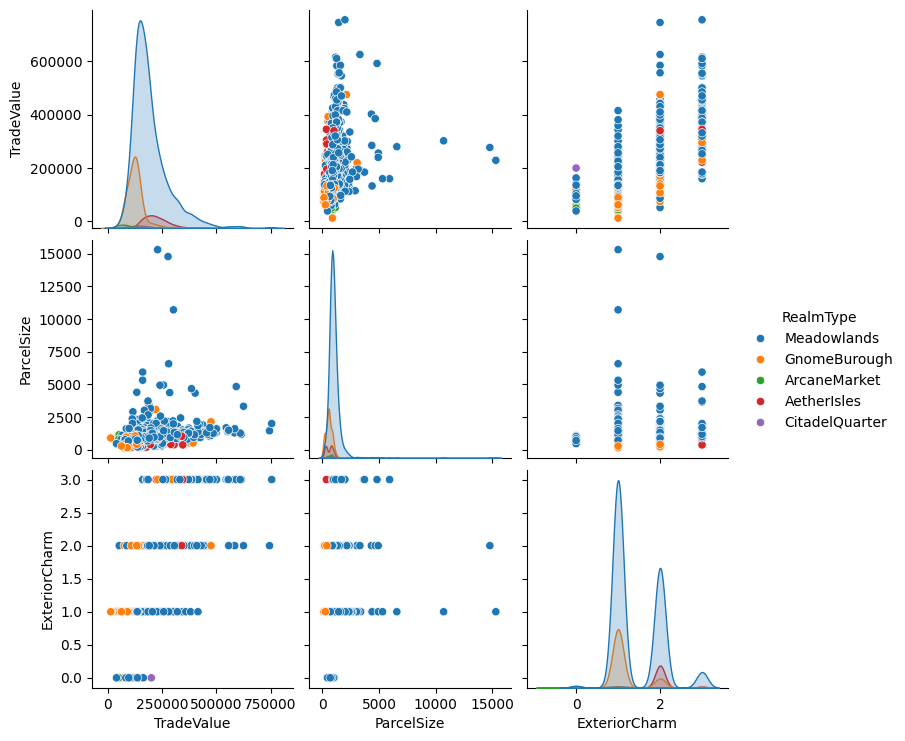

In [12]:
sns.pairplot(df[['TradeValue','RealmType','ParcelSize','ExteriorCharm']],hue='RealmType')

#### Try both alrogithms 

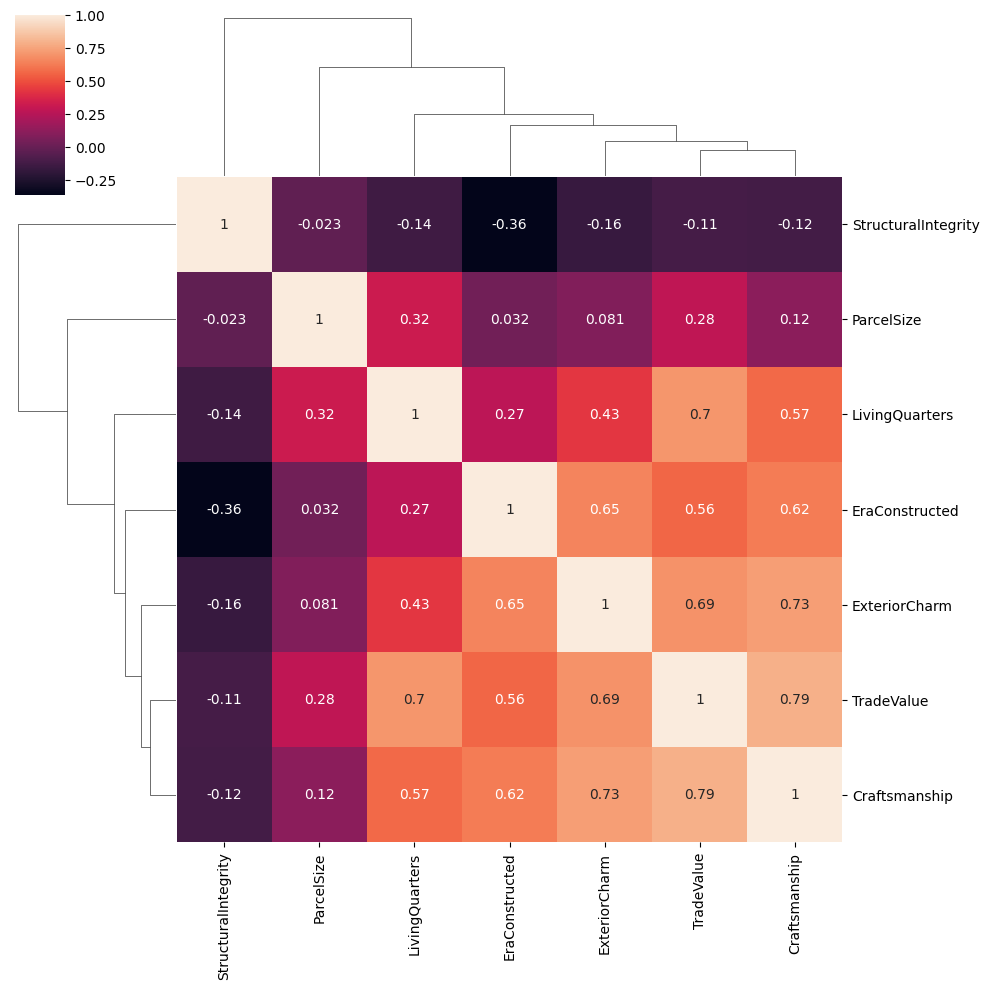

In [13]:
sns.clustermap(
	df.filter(items=[col for col in df.columns if col not in ['RealmType','Enclave','ParcelSizeUnit','DI']]).corr(),
	annot=True
	)
	

## Modeling

In [ ]:
# for classifcation
df["NeedsRestoration"] = df['Craftsmanship'] * 0
def calculate_needs_restoration(row):
    age_factor = 1 if row['EraConstructed'] < 1300 else 0 
    structure_factor = 1 if row['StructuralIntegrity'] <= 6 else 0
    total_factors = age_factor + structure_factor
    return True if total_factors >= 2 else False

df["NeedsRestoration"] = df.apply(calculate_needs_restoration, axis=1)

X_train, X_test,y_train, y_test = train_test_split(df.filter(items=[col for col in df.columns if col not in ["RealmType","Enclave","ParcelSizeUnit"]]),df['NeedsRestoration'], test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
print(clf.score())

y_pred = clf.predict(X_test)








TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'